# Sentiment Analysis of Reddit Posts: Project Overview

### Objective:
The goal of this project is to perform sentiment analysis on any sub reddit posts. Here, I have used ArtificialInteligence subreddit for Sentiment analysis that involves determining the sentiment or emotional tone expressed in textual data, in this case, the comments on Reddit posts.

### Natural Language Processing(NLP): 
This field intersects computer science, artificial intelligence, and linguistics, focusing on creating computational models to process and understand the semantic relationships between words (e.g., cat and dog have a closer semantic connection than dog and spoon). NLP also encompasses text-to-speech, language translation, and other language-related tasks.


### Sentiment Analysis : 
It involves interpreting and categorizing emotions (positive, negative) within textual data through text analysis techniques. Sentiment analysis empowers organizations to discern public sentiment towards specific words or topics.

 ## Data Acquisition:
 * **Using PRAW Library:**
For this project, the data was acquired from Reddit using the PRAW (Python Reddit API Wrapper) library. PRAW allows seamless interaction with the Reddit API, enabling the extraction of post titles, URLs, top comments, and associated scores. The dataset was collected from various subreddits related to NFTs and cryptocurrency.

In [80]:
# Import the 'praw' library for interacting with the Reddit API
import praw
# Import the 'csv' module for reading and writing CSV files
import csv


## Reddit API Credentials:
**To perform sentiment analysis on Reddit, you need to obtain API credentials by following these steps:**		

1. **Create a Reddit Developer Account**

   Visit the [Reddit Apps](https://www.reddit.com/prefs/apps) page and log in with your Reddit account. If you don&rsquo;t have one, you&rsquo;ll need to create a Reddit account.

2. **Create a New App**

   - Scroll down to the "Developed Applications" section.
   - Click on the "Create App" or "Create Another App" button.

3. **Configure Your App**

   - **name**: Choose a name for your application.
   - **App type**: Select "script."
   - **description**: Provide a brief description of your application.
   - **permissions**: For script-type apps, you don&rsquo;t need any specific permissions.

4. **Note Down Your Credentials**

   After creating the app, you will see a page with your app details. Note down the following:
   - **client_id**: This is your app&rsquo;s client ID.
   - **client_secret**: This is your app&rsquo;s client secret.

5. **Configure Your Python Script**

   Use the obtained `client_id` and `client_secret` in your Python script:

   import praw

### Configure your Reddit API credentials
reddit = praw.Reddit(
    client_id='YOUR_CLIENT_ID',
    client_secret='YOUR_CLIENT_SECRET',
    user_agent='YOUR_USER_AGENT'
)

##### Replace 'YOUR_CLIENT_ID' and 'YOUR_CLIENT_SECRET' with the values you obtained in step 4.
Now, with the proper API credentials, you can perform sentiment analysis on Reddit data using the PRAW library or any other suitable tool.
Here, I have used a filled a sample Reddit API Credentials for your convenience.

In [76]:
# Configure your Reddit API credentials
reddit = praw.Reddit(
    client_id='PZvbq3YzCVLz6g9pvmOcMw',
    client_secret='j0VDYpuWFaFceb9yi08FhzXhn4ho6A',
    user_agent='stackupBounty'
)

In [131]:
# Define the subreddit you want to scrape
subreddit_name = 'ArtificialInteligence'  # Change to your desired subreddit

In [132]:
# Get the top posts from the subreddit
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.top(limit=None)  # You can change the limit as needed

In [ ]:
# Create a CSV file for storing the data with UTF-8 encoding
with open('reddit_dataset.csv', 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Post Title', 'Post URL', 'Top Comment', 'Top Comment Score'])

    # Iterate through the top posts and get their top comment
    for post in top_posts:
        post_title = post.title
        post_url = post.url

        # Get the top comment
        top_comment = None
        top_score = 0
        for comment in post.comments:
            if comment.score > top_score:
                top_score = comment.score
                top_comment = comment

        if top_comment:
            top_comment_text = top_comment.body
            csv_writer.writerow([post_title, post_url, top_comment_text, top_score])
        else:
            csv_writer.writerow([post_title, post_url, 'No top comment found', 0])

print("Data has been saved to 'reddit_dataset.csv'")

## Importing Libraries and Reading Data

### Libraries Overview:

- **pandas (`import pandas as pd`):** Used for data manipulation and analysis. It provides data structures like DataFrames, which are effective for handling structured data.

- **numpy (`import numpy as np`):** Used for numerical operations on arrays and matrices. It complements pandas in handling numerical data efficiently.

- **matplotlib (`import matplotlib.pyplot as plt`):** A popular data visualization library for creating static, animated, and interactive plots.

- **seaborn (`import seaborn as sns`):** Built on top of matplotlib, seaborn enhances the visual appeal of plots and provides additional functionalities for statistical visualization.

- **nltk (`import nltk`):** The Natural Language Toolkit is used for natural language processing tasks, including tokenization, stemming, and sentiment analysis.

- **emoji (`import emoji`):** A Python module for dealing with emojis, useful in emoji-related text processing.

- **string (`import string`):** Provides common string operations and character sets, helpful in text preprocessing.

- **re (`import re`):** The regular expression module in Python, used for pattern matching and string manipulation.

In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import emoji
import string
import re

## Read the dataset into a DataFrame
The dataset obtained from Reddit is stored in a CSV file ('reddit_dataset.csv'). Pandas is used to read this dataset into a DataFrame for further analysis.


In [110]:
df = pd.read_csv('reddit_dataset.csv')
print(df.shape)

(997, 4)


## DataFrame Structure:
The DataFrame contains information about Reddit posts, including post title, post URL, top comment, and the score of the top comment. Each row represents a different Reddit post.

In [109]:
df.head()

,Post Title,Post URL,Top Comment,Top Comment Score
0,🦹‍♀💣 Bomberbabes | Reversed BAYC marketing str...,https://www.reddit.com/r/NFTMarketplace/commen...,Good project,1
1,Gym Network | Earn Profits + Rewards + Affilia...,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
2,Why Shinsekai Is The Uniquest NFT Ever,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
3,HUGE NEWS!!! ARB ROUND 2,https://i.redd.it/scd7foprmr5b1.png,#SCAM! THEY HAVE POSTED ON EVERY CRYPTO FORUM ...,1
4,I think Decentraland will flip Sandbox in floo...,https://link.poly.market/decentraland-vs-sandb...,0x20b3e84ea42ffbb9c1fbced052c17c4706e76a04\n\n...,1


## Data Processing and Cleaning:
The data cleaning process involves handling missing values, removing unwanted characters, and preparing the text data for sentiment analysis. The NLTK library is employed for text processing tasks such as removing emojis, punctuation, and stopwords, as well as tokenization.

In [15]:
# Function to remove emojis from text
def remove_emojis(text):
    cleaned_text = emoji.demojize(text)
    cleaned_text = cleaned_text.replace(":", "")  # Remove colons used by emoji codes
    return cleaned_text

In [16]:
# Function to remove specific text from a given string
def remove_text(text, text_to_remove):
    return text.replace(text_to_remove, '')

In [116]:
# Function to remove punctuation, links, and HTML tags from text
def remove_puncs_and_link(text):
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    return text

In [115]:
# Example usage of the functions
example = df['Top Comment'][50]
example

'Lovely post! #Popcult is the solid NFT project of the moment!'

## Tokenization:
Tokenization involves breaking down text into individual words. The NLTK library's punkt tokenizer is used for this purpose.

In [114]:
# Download the punkt tokenizer from NLTK
nltk.download('punkt')  # Download the punkt tokenizer

def tokenize_text(text):
    # Tokenize the input text into words
    tokens = nltk.word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [113]:
# Tokenize the example text
tokens = nltk.word_tokenize(example)
tokens[:10]

['Lovely', 'post', '!', '#', 'Popcult', 'is', 'the', 'solid', 'NFT', 'project']

## Removing Stopwords:
Stopwords are common words (e.g., "and," "the") that are often removed from text during natural language processing to focus on meaningful words.

In [117]:
from nltk.corpus import stopwords
# Download English stopwords from NLTK

nltk.download('stopwords')
# Function to remove stopwords from text

def remove_stopwords(text):
    # Tokenize the input text into words
    words = nltk.word_tokenize(text)

    # Get the list of English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tokenized words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a text
    filtered_text = ' '.join(filtered_words)

    return filtered_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part-of-Speech Tagging:
Part-of-speech tagging assigns a part of speech (e.g., noun, verb) to each word in a sentence.

In [22]:
from nltk import pos_tag
# Download the averaged perceptron tagger from NLTK

nltk.download('averaged_perceptron_tagger')
# Part-of-speech tagging using NLTK

tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Lovely', 'RB'),
 ('post', 'NN'),
 ('!', '.'),
 ('#', '#'),
 ('Popcult', 'NNP'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('solid', 'JJ'),
 ('NFT', 'NNP'),
 ('project', 'NN')]

## Named Entity Recognition (NER):
Named Entity Recognition identifies entities such as names, organizations, and locations in text.

In [23]:
# Download necessary resources for named entity recognition

nltk.download('maxent_ne_chunker')
nltk.download('words')
# Perform named entity recognition

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...


(S
  Lovely/RB
  post/NN
  !/.
  #/#
  (PERSON Popcult/NNP)
  is/VBZ
  the/DT
  solid/JJ
  (ORGANIZATION NFT/NNP)
  project/NN
  of/IN
  the/DT
  moment/NN
  !/.)


[nltk_data]   Unzipping corpora\words.zip.


## Text Stemming:
Stemming reduces words to their root or base form. The Porter stemmer from NLTK is applied in this case.

In [24]:
from nltk.stem import PorterStemmer

def stem_text(text):
    # Tokenize the input text into words
    tokens = nltk.word_tokenize(text)

    # Initialize the Porter stemmer
    stemmer = PorterStemmer()

    # Apply stemming to each token and store the result in a list
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join the stemmed tokens back into a text
    stemmed_text = ' '.join(stemmed_tokens)

    return stemmed_text

## Removing Duplicates:
Removing duplicate words from text.

In [85]:
def remove_duplicates(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Use a set to remove duplicates, then join the unique tokens back into text
    unique_tokens = list(set(tokens))
    cleaned_text = ' '.join(unique_tokens)
    return cleaned_text

## Complete Text Preprocessing Function:
Combining all the preprocessing steps into a single function.

In [119]:
def preprocess_data(text):
  text = remove_emojis(text)
  text = remove_text(text, '\n')  # You can specify other text to remove here
  text = remove_puncs_and_link(text)
  text = tokenize_text(text)
  text = ' '.join(text)
  text = remove_stopwords(text)
  text = stem_text(text)
  return text

for i in range(df.shape[0]):
    preprocessed_comment = preprocess_data(df['Top Comment'][i])
    print(preprocessed_comment)
    print("\n")

good project


top comment found


top comment found


scam post everi crypto forum eith peopl comment posit avoid like cancer


0x20b3e84ea42ffbb9c1fbced052c17c4706e76a04discord nathanoel6908lov nft


komodojo nft digit pet game full color komodo dragon born special element power trait abil bond dragon play fight komodojo ’ reserv spot komodo kingdom 10000 total suppli komodojo nft trait combin 11 websit httpskomodojoespac komodojo ’ develop aim becom communitybas open sourc spawn uniqu komodojo avatar commun built mini game decentr 3d univers like decentraland team compet dragon minigam earn xp improv trait stat detail whitepap come soon nft prize distribut base first 200 comment upvot post first 200 address comment 5 winner randomli select draw


drop eth wallet comment join discord join one ongo giveaway


offici link websit httpsralphscountryclubcomhttpsralphscountryclubcom discord httpsdiscordggrcchttpsdiscordggrcc twitter httpstwittercomralphscountrychttpstwittercomralphscountry

ruleskeycap1upvot keycap2 join discord httpsdiscordggmpgfgrpzyzkeycap3 comment address discord name


remov


ruleskeycap1upvot keycap2 join discord httpsdiscordggke5hpveykeycap3 comment address discord name


httpsopenseaiocollectioncryptokeytarshttpsopenseaiocollectioncryptokeytar httpswwwinstagramcomcryptokeytarshttpswwwinstagramcomcryptokeytar httpstwittercomcryptokeytarshttpstwittercomcryptokeytar


1 join server httpsdiscordggy4er7ds79u 2 upvot 3 drop wallet comment winner chosen randomli


enter upvot post join discord verifi httpsdiscordggbeqpmtbvw9 comment discord usernam eth wallet address


join discord say play gener chat join duck race free nft mintsalso everyon mint free ga fee everyon join discord httpsdiscordggaurcbcfc7zhttpsdiscordggaurcbcfc7z


enter giveaway upvot post join discord httpsdiscordggpupwazfydp comment discord name eth wallet address


join discord httpsdiscordggudpzzwyxgb


top comment found


signal awesom 1140 yearstaday moreov offer good discount im r

enter giveaway upvot post join discord httpsdiscordgg4ujg7wwurk comment discord name wallet address


join discord ad whitelist particip presal get special price · discord httpsdiscordggwzazk68sum · twitter httpstwittercomwabipunk


0xb5f07b54b93777141d8cbd02d8bde15d5f6631f8


join discord httpsdiscordggzcvvmwxkpfcom discord name eth wallet


remov


remov


0xb4a01d2efe688c16bf67930aae2b30a9b02c29b


0xdd202335633acc5d9e903a98ec215b5bcb99a8fd discord blackcrypto4047


memecoin announc time get best token httptwittercommemecoin0xstatus1735458005712273585s20


top comment found


top comment found


top comment found


top comment found


scam


top comment found


realli rise nba top shot signal begin huge surg mainstream interest nft entir flow blockchain ecosystem id say that pretti good choic


0x23c0b471dac0523aa6d7386ed9777dcd233e2a63


top comment found


remov


good chanc us ill take


guy tell make distribut opensea think bad topic attract peopl nft project figur ’ leav link f

top comment found


great team project dev deliv get still super earli


join discord open 98 httpsdiscordgge9dndzrwpt twitter httpstwittercomraideontcg


love cool dam


receiv prize join discordhttpsdiscordggkbuxjd92httpsdiscordggkbuxjd92 retweet last posthttpstwittercomtigerbilionairestatus1523618786674311168httpstwittercomtigerbilionairestatus1523618786674311168


come closer mint decid open discord public httpsdiscordggup7t3f5thttpsdiscordggup7t3f5tjoin pack 5000 wolv embark mission conquer metaverseutilitiesp2 game social hub game sandbox land develop comic book seri merch giveaway stake announcedth wolv alphapack planet alpha centuri live peac armi giant ape descend upon planet alpha wipe half popul brink extinct desper answer scientist alphapack began experi secret lab despit multipl failur breakthrough made discoveri alpha serum gave wolv physic mutat would help fight back issu would take time concoct serum time someth pack somehow midst prepar enough serum pack ape found wolv

need 1 upvot post reach people2 join channel discord wait result httpsdiscordggtz536npn3 follow new page twitterhttpstwittercomvictusnftstwsjh83cpadl0ojv62qt1ows094 drop address tell friend never lose hope yesterday 16 year old filipina girl 1 ethraisinghand


wrappedgift deluxegoat nft giveaway wrappedgift rule keycap1 upvot keycap2 join discord httpsdiscordggspag2ge5 get verifi discord keycap3 drop wallet discord name verifi good luck


celebr launch massiv giveaway discord twitter instagram enter 1 upvot 2 upvot comment doesnt get lost 3 join discord post wallet address giveaway channel chanc win 6 nft httpsdiscordggwqqa3jpgtthttpsdiscordggwqqa3jpgtt chanc win 2 nft follow us twitter instagram giveaway follow celebr launch day link httpslinktreeantisocialhorseclub


1 join discord verifi 2 upvot post comment httpsdiscordgg3nzarhywqn good luck


0x45513c770f20afcab80ce1a61e50ea1f5134df9d thank


hi everyon start sell art opensea would love support would happi make offer nft 10 donat 

keycap1 upvot keycap2 join discord httpsdiscordgg8sykmhkxcq keycap3 comment wallet


foolish may sound well wait macroeconom issu blow fed pivot see good traction nft im still wait im ad good coin portfolio save blueprint merg nft nitro leagu beta game android pc


ye metaversusworld includ excel game equal excel gameplay may even experi hyperrealist


top comment found


top comment found


top comment found


top comment found


moneywithw june free nft giveaway vip girl


nft giveaway likewrappedgift 1like item collect 2 write eth wallet comment like giveaway httpsopenseaiocollectioncyberpunkmetavers


top comment found


top comment found


top comment found


join discord boy httpsdiscordgghtxbjy9uu3


follow us twitter httpstwittercomhuromuoffici


join discord boy httpsdiscordgghtxbjy9uu3


join discord boy httpsdiscordgghtxbjy9uu3


0x8e795fbf30df6a919a7bbc767c9f0b437072a064


launch bitcodeart platform gener art httpswwwbitcodeart 1 giveaway ongo 2 upvot post join discord http

# VADER Seniment Scoring

#### VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-built sentiment analysis tool included in the NLTK library. It is designed to provide a sentiment intensity score for text data by analyzing the polarity (positive, negative, neutral) and providing a compound score, which represents the overall sentiment.
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

 ## 1. Import Libraries:
* Import the necessary libraries, including NLTKs SentimentIntensityAnalyzer.

In [88]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# Download VADER lexicon from NLTK
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The SentimentIntensityAnalyzer class from NLTK provides a simple interface to access the sentiment scores.

In [89]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.717}

In [90]:
# df.insert(0, 'ID', range(1, 1001))
# df
df.insert(0, 'ID', range(1, len(df) + 1))

# Print the DataFrame
print(df)

      ID                                         Post Title  \
0      1  🦹‍♀💣 Bomberbabes | Reversed BAYC marketing str...   
1      2  Gym Network | Earn Profits + Rewards + Affilia...   
2      3             Why Shinsekai Is The Uniquest NFT Ever   
3      4                           HUGE NEWS!!! ARB ROUND 2   
4      5  I think Decentraland will flip Sandbox in floo...   
..   ...                                                ...   
992  993  Unlock the Power of Auto-Compounding with Prof...   
993  994                                        Coming Soon   
994  995                            Steamboat Willie #ver.1   
995  996                     FREE MINT - Happy 2024 Event !   
996  997                     FREE MINT - Happy 2024 Event !   

                                              Post URL  \
0    https://www.reddit.com/r/NFTMarketplace/commen...   
1    https://www.reddit.com/r/NFTMarketplace/commen...   
2    https://www.reddit.com/r/NFTMarketplace/commen...   
3          

 ## 2. Run Sentiment Analysis:

* Run the VADER sentiment analysis on the text data.

The polarity_scores function returns a dictionary containing four scores: 'neg' (negative), 'neu' (neutral), 'pos' (positive), and 'compound'. The 'compound' score is a combination of the three individual scores and is often used to represent the overall sentiment.

In [45]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Top Comment']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/997 [00:00<?, ?it/s]

 ## 3. Create DataFrame:

* Create a DataFrame with sentiment scores and merge it with the original dataset.

This DataFrame (vaders) now contains sentiment scores along with the original data, facilitating further analysis and visualization.

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [92]:
vaders.head()

,ID,neg,neu,pos,compound,Post Title,Post URL,Top Comment,Top Comment Score
0,1,0.000,0.256,0.744,0.4404,🦹‍♀💣 Bomberbabes | Reversed BAYC marketing str...,https://www.reddit.com/r/NFTMarketplace/commen...,Good project,1
1,2,0.367,0.333,0.300,-0.1027,Gym Network | Earn Profits + Rewards + Affilia...,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
2,3,0.367,0.333,0.300,-0.1027,Why Shinsekai Is The Uniquest NFT Ever,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
3,4,0.095,0.602,0.304,0.7067,HUGE NEWS!!! ARB ROUND 2,https://i.redd.it/scd7foprmr5b1.png,#SCAM! THEY HAVE POSTED ON EVERY CRYPTO FORUM ...,1
4,5,0.227,0.420,0.353,0.3612,I think Decentraland will flip Sandbox in floo...,https://link.poly.market/decentraland-vs-sandb...,0x20b3e84ea42ffbb9c1fbced052c17c4706e76a04\n\n...,1


In [48]:
df.head()

,ID,Post Title,Post URL,Top Comment,Top Comment Score
0,1,🦹‍♀💣 Bomberbabes | Reversed BAYC marketing str...,https://www.reddit.com/r/NFTMarketplace/commen...,Good project,1
1,2,Gym Network | Earn Profits + Rewards + Affilia...,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
2,3,Why Shinsekai Is The Uniquest NFT Ever,https://www.reddit.com/r/NFTMarketplace/commen...,No top comment found,0
3,4,HUGE NEWS!!! ARB ROUND 2,https://i.redd.it/scd7foprmr5b1.png,#SCAM! THEY HAVE POSTED ON EVERY CRYPTO FORUM ...,1
4,5,I think Decentraland will flip Sandbox in floo...,https://link.poly.market/decentraland-vs-sandb...,0x20b3e84ea42ffbb9c1fbced052c17c4706e76a04\n\n...,1


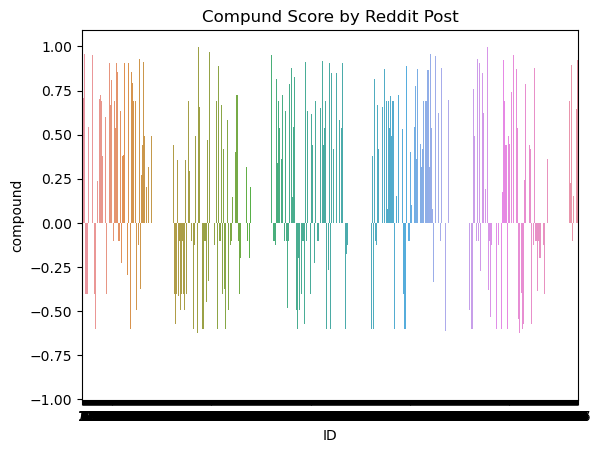

In [49]:
ax = sns.barplot(data=vaders, x='ID', y='compound')
ax.set_title('Compund Score by Reddit Post')
plt.show()

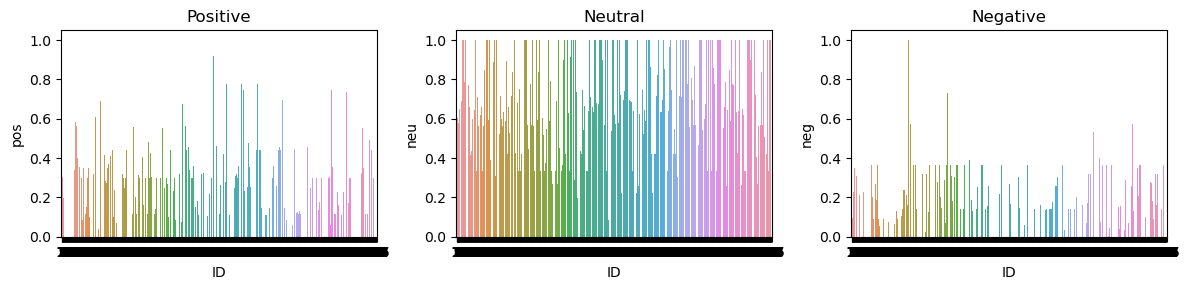

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='ID', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='ID', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='ID', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## 4. Results Visualization:

* Matplotlib and Seaborn are used to present the sentiment analysis results in various visualizations, including bar plots for compound sentiment scores and distribution of positive, neutral, and negative sentiments.

### Compound Sentiment Scores Bar Plot


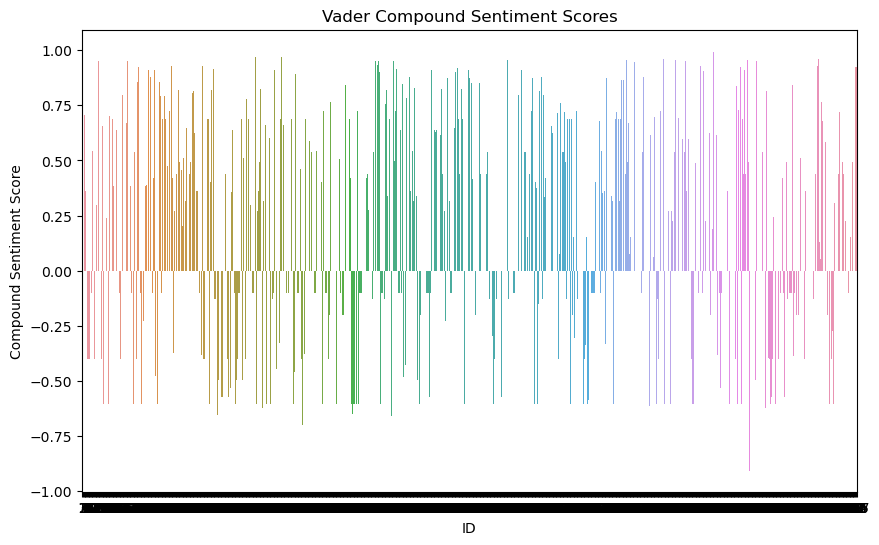

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for compound sentiment scores
plt.figure(figsize=(10, 6))
sns.barplot(x='ID', y='compound', data=vaders)
plt.title('Vader Compound Sentiment Scores')
plt.xlabel('ID')
plt.ylabel('Compound Sentiment Score')
plt.show()


## Word Cloud Analysis 
This presents a visual exploration of sentiments expressed in Reddit comments using word clouds. Word clouds are generated for positive, negative, and neutral sentiments, providing an intuitive representation of the most frequently occurring words within each sentiment category. The size of each word in the cloud corresponds to its frequency in the text. Explore these visualizations to gain insights into the key themes and sentiments prevalent in the Reddit community discussions.

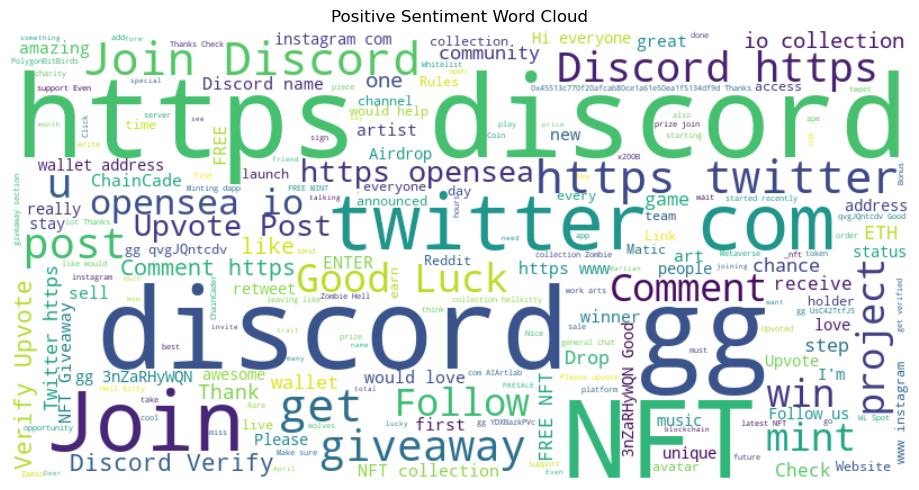

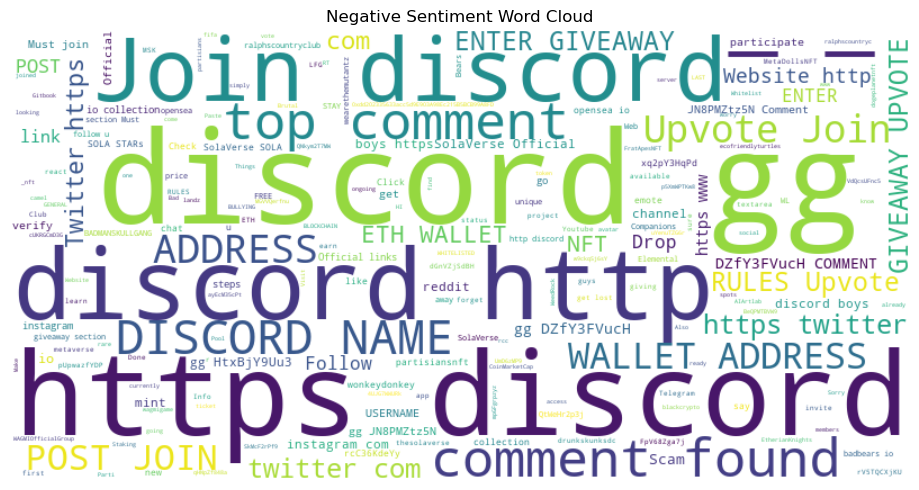

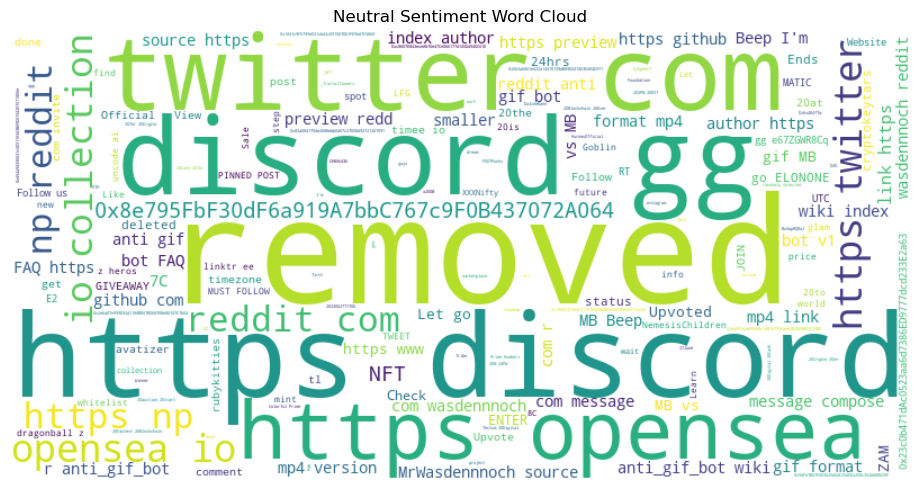

In [130]:
from wordcloud import WordCloud

# Function to generate and display word cloud
def generate_word_cloud(text, title, stopwords):
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Generate and display word clouds for positive, negative, and neutral sentiments
generate_word_cloud(positive_text, 'Positive Sentiment Word Cloud', stopwords)
generate_word_cloud(negative_text, 'Negative Sentiment Word Cloud', stopwords)
generate_word_cloud(neutral_text, 'Neutral Sentiment Word Cloud', stopwords)


### Positive, Neutral, Negative Sentiments Distribution


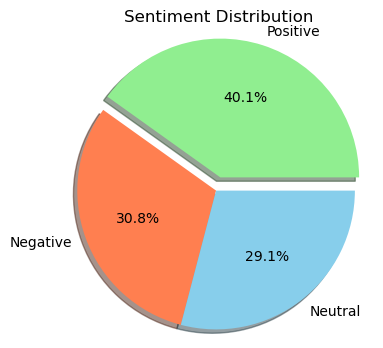

In [107]:
# Categorize sentiments into Positive, Negative, and Neutral
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

vaders['Sentiment'] = vaders['compound'].apply(categorize_sentiment)

# Create a pie chart
sentiment_counts = vaders['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['lightgreen', 'coral', 'skyblue']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


**These visualizations provide insights into the sentiment distribution across the dataset.**

The project successfully conducted sentiment analysis on the Reddit posts, providing valuable insights into the sentiment distribution across the dataset. Visualizations facilitated the interpretation of sentiment scores, allowing for a better understanding of the overall sentiment landscape.

The pie chart, in particular, summarized the sentiment distribution, showcasing the percentage of positive, negative, and neutral sentiments. This information is crucial for understanding community sentiments and can be beneficial for various applications, including market analysis and community engagement strategies.



# Project Conclusion: Sentiment Analysis of Reddit Posts

## Overview
In this comprehensive sentiment analysis project, we explored the sentiments expressed in a dataset of Reddit posts related to Non-Fungible Tokens (NFTs). The project involved a multi-step process, starting from data collection to advanced natural language processing (NLP) techniques and insightful visualizations.

## Data Processing and Cleaning
The initial phase included thorough data processing and cleaning. We employed the NLTK library to handle missing values, remove unwanted characters, and prepare the text data for sentiment analysis. Tasks such as removing emojis, punctuation, and stopwords were crucial to enhance the quality of the text data.

## VADER Sentiment Scoring
The sentiment analysis was performed using VADER (Valence Aware Dictionary and sEntiment Reasoner), a powerful pre-built sentiment analysis tool in the NLTK library. This involved using NLTK's SentimentIntensityAnalyzer to obtain negative, neutral, and positive scores, as well as an overall compound score for each post.

## Data Visualization
To visually represent the sentiment analysis results, we utilized Matplotlib and Seaborn to create compelling visualizations. Bar plots showcased compound sentiment scores, while a pie chart summarized the distribution of sentiments across the dataset.

## Word Clouds
In addition to quantitative analyses, we leveraged word clouds to provide an intuitive representation of the most frequent words associated with positive, negative, and neutral sentiments. This added a qualitative dimension to our exploration of sentiment trends.

## Conclusion
This project serves as a comprehensive exploration of sentiment analysis techniques applied to Reddit posts, specifically within the NFT market context. By integrating data processing, sentiment scoring, and visualization, we gained valuable insights into the sentiment landscape of the dataset. These findings contribute to a deeper understanding of sentiment trends in the NFT-related discussions on Reddit.
In summary, the sentiment analysis project effectively applied natural language processing techniques to derive actionable insights from Reddit posts, providing a comprehensive understanding of the sentiments expressed in the dataset.

**Project Key Takeaways:**
- Application of NLP techniques for data preprocessing.
- Utilization of VADER for sentiment scoring.
- Visualization of sentiment scores using Matplotlib and Seaborn.
- Integration of word clouds for intuitive representation of sentiment-associated words.

This project not only showcases the technical proficiency in NLP and sentiment analysis but also highlights the potential for extracting meaningful insights from unstructured text data in online communities.

